In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
pd.read_csv("")

In [5]:
def getcsv():
    '''The function downloads the 'H1B data'
    Author: vys217
    '''
    print ("Downloading")
    
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + "H-1B_Disclosure_Data_FY15_Q4.xlsx"):
        if os.path.isfile("H-1B_Disclosure_Data_FY15_Q4.xlsx"):
            # if in the current dir just move it
            if os.system("mv " + "H-1B_Disclosure_Data_FY15_Q4.xlsx " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + "H-1B_Disclosure_Data_FY15_Q4.xlsx"):
                if not os.path.isfile("H-1B_Disclosure_Data_FY15_Q4.xlsx"):
                    os.system("wget https://www.foreignlaborcert.doleta.gov/docs/py2015q4/H-1B_Disclosure_Data_FY15_Q4.xlsx")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + "H-1B_Disclosure_Data_FY15_Q4.xlsx " + os.getenv("PUIDATA"))

    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + "H-1B_Disclosure_Data_FY15_Q4.xlsx"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [6]:
getcsv()

Downloading
file in place, you can continue


In [35]:
data = pd.read_excel(os.getenv('PUIDATA')+'/'+"H-1B_Disclosure_Data_FY15_Q4.xlsx")

In [36]:
data.dtypes

CASE_NUMBER                      object
CASE_STATUS                      object
CASE_SUBMITTED           datetime64[ns]
DECISION_DATE            datetime64[ns]
VISA_CLASS                       object
EMPLOYMENT_START_DATE            object
EMPLOYMENT_END_DATE              object
EMPLOYER_NAME                    object
EMPLOYER_ADDRESS1                object
EMPLOYER_ADDRESS2                object
EMPLOYER_CITY                    object
EMPLOYER_STATE                   object
EMPLOYER_POSTAL_CODE             object
EMPLOYER_COUNTRY                 object
EMPLOYER_PROVINCE                object
EMPLOYER_PHONE                  float64
EMPLOYER_PHONE_EXT              float64
AGENT_ATTORNEY_NAME              object
AGENT_ATTORNEY_CITY              object
AGENT_ATTORNEY_STATE             object
JOB_TITLE                        object
SOC_CODE                         object
SOC_NAME                         object
NAIC_CODE                       float64
TOTAL WORKERS                   float64


In [37]:
data['decision_date'] = data.DECISION_DATE - data.CASE_SUBMITTED
data = data[data.VISA_CLASS == 'H-1B']

In [38]:
data1 = data.copy()

In [39]:
data1.drop(['EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 
                    'EMPLOYER_POSTAL_CODE', 'VISA_CLASS', 'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE',
                    'EMPLOYER_PHONE', 'EMPLOYER_PHONE_EXT', 'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY',
                    'AGENT_ATTORNEY_STATE', 'SOC_CODE', 'PW_WAGE_SOURCE', 'PW_WAGE_SOURCE_YEAR', 
                    'PW_WAGE_SOURCE_OTHER', 'WORKSITE_COUNTY'], axis = 1, inplace = True)


In [40]:
print(data1.shape)
data1.head()

(605803, 23)


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_NAME,NAIC_CODE,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,decision_date
0,I-200-09121-701936,WITHDRAWN,2015-02-05,2015-02-05,02/09/2015,02/28/2015,"MEDTRONIC, INC.",MECHANICAL ENGINEER,MECHANICAL ENGINEERS,334510.0,...,Year,Level I,20000 -,Year,N,N,EDEN PRAIRIE,CA,55412,0 days
1,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,01/05/2015,01/04/2018,UNIVERSITY OF OKLAHOMA,ASSISTANT PROFESSOR,"ENGINEERING TEACHERS, POSTSECONDARY",611310.0,...,Year,Level I,85000.00 -,Year,N,N,NORMAN,OK,73019,6 days
2,I-200-09180-329758,WITHDRAWN,2013-01-03,2014-12-15,01/07/2013,01/06/2016,NOKIA INC.,RELEASE AND SOFTWARE TEST MANAGER,"COMPUTER OCCUPATIONS, ALL OTHER*",517212.0,...,Year,Level II,94000 -,Year,N,N,SAN DIEGO,CA,92127,711 days
3,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,09/07/2015,09/07/2018,"OMRON OILFIELD AND MARINE, INC.",CONTROL ENGINEERING SPECIALIST,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",335314.0,...,Year,Level I,66000 - 70000,Year,N,N,HOUSTON,TX,77088,6 days
4,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,06/06/2015,06/05/2018,FEDERAL HOME LOAN MORTGAGE CO.,DEVELOPMENT SENIOR,COMPUTER PROGRAMMERS,522294.0,...,Year,Level IV,97000 - 143300,Year,N,N,MCLEAN,VA,22102,6 days


In [41]:
data1.groupby('CASE_STATUS').count()

,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_NAME,NAIC_CODE,TOTAL WORKERS,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,decision_date
CASE_STATUS,,,,,,,,,,,,,,,,,,,,,
CERTIFIED,536693,536693,536693,536693,536693,536692,536693,536693,536692,536693,...,536693,513949,536693,536693,536693,536693,536685,536693,536685,536693
CERTIFIED-WITHDRAWN,40368,40368,40368,40368,40368,40368,40368,40368,40368,40368,...,40368,37619,40368,40368,40368,40368,40367,40368,40366,40368
DENIED,9703,9703,9703,9701,9701,9702,9699,9700,9701,9702,...,9662,8188,9703,9690,9684,9685,9698,9695,9695,9703
WITHDRAWN,19039,19039,19039,19022,19022,19018,19023,19026,19022,19025,...,19023,18086,19039,19023,19023,19023,19020,19022,19020,19039


In [71]:
data2 = data1[(data1['CASE_STATUS'] == 'DENIED') | (data1['CASE_STATUS'] == 'CERTIFIED')]
data2.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_NAME,NAIC_CODE,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,decision_date
1,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,01/05/2015,01/04/2018,UNIVERSITY OF OKLAHOMA,ASSISTANT PROFESSOR,"ENGINEERING TEACHERS, POSTSECONDARY",611310.0,...,Year,Level I,85000.00 -,Year,N,N,NORMAN,OK,73019,6 days
3,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,09/07/2015,09/07/2018,"OMRON OILFIELD AND MARINE, INC.",CONTROL ENGINEERING SPECIALIST,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",335314.0,...,Year,Level I,66000 - 70000,Year,N,N,HOUSTON,TX,77088,6 days
4,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,06/06/2015,06/05/2018,FEDERAL HOME LOAN MORTGAGE CO.,DEVELOPMENT SENIOR,COMPUTER PROGRAMMERS,522294.0,...,Year,Level IV,97000 - 143300,Year,N,N,MCLEAN,VA,22102,6 days
6,I-200-09212-834534,CERTIFIED,2014-10-14,2014-10-20,11/03/2014,11/02/2017,"VMWARE, INC.",STAFF ENGINEER,"SOFTWARE DEVELOPERS, APPLICATIONS",541511.0,...,Year,NaN,155000.00 -,Year,N,N,PALO ALTO,CA,94304,6 days
7,I-200-09232-212049,CERTIFIED,2014-12-17,2014-12-23,06/14/2015,06/13/2018,FEDERAL HOME LOAN MORTGAGE CORPORATION,CREDIT GUARANTEE ANALYTICS SENIOR,OPERATIONS RESEARCH ANALYSTS,522294.0,...,Year,Level I,64100 - 127000,Year,N,N,MCLEAN,VA,22102,6 days


In [72]:
data2.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
       'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
       'JOB_TITLE', 'SOC_NAME', 'NAIC_CODE', 'TOTAL WORKERS',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'WAGE_RATE_OF_PAY', 'WAGE_UNIT_OF_PAY',
       'H-1B_DEPENDENT', 'WILLFUL VIOLATOR', 'WORKSITE_CITY', 'WORKSITE_STATE',
       'WORKSITE_POSTAL_CODE', 'decision_date'],
      dtype='object')

In [73]:
data2.drop(['CASE_NUMBER', 'DECISION_DATE',
       'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
       'JOB_TITLE', 'SOC_NAME', 'NAIC_CODE', 'TOTAL WORKERS',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'WAGE_RATE_OF_PAY', 'WAGE_UNIT_OF_PAY',
       'H-1B_DEPENDENT', 'WILLFUL VIOLATOR', 'WORKSITE_CITY', 'WORKSITE_STATE',
       'WORKSITE_POSTAL_CODE', 'decision_date'], axis=1, inplace= True)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [74]:
data2_count = data2.groupby(['CASE_STATUS']).count()

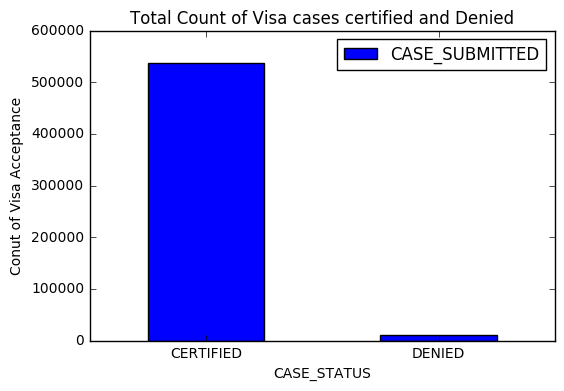

In [77]:
data2_count.plot(kind='bar',rot=360)
plt.ylabel('Conut of Visa Acceptance')
plt.title('Total Count of Visa cases certified and Denied')

In [76]:
data3 = data1[(data1['CASE_STATUS'] == 'DENIED') | (data1['CASE_STATUS'] == 'CERTIFIED')]
data3.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_NAME,NAIC_CODE,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,decision_date
1,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,01/05/2015,01/04/2018,UNIVERSITY OF OKLAHOMA,ASSISTANT PROFESSOR,"ENGINEERING TEACHERS, POSTSECONDARY",611310.0,...,Year,Level I,85000.00 -,Year,N,N,NORMAN,OK,73019,6 days
3,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,09/07/2015,09/07/2018,"OMRON OILFIELD AND MARINE, INC.",CONTROL ENGINEERING SPECIALIST,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",335314.0,...,Year,Level I,66000 - 70000,Year,N,N,HOUSTON,TX,77088,6 days
4,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,06/06/2015,06/05/2018,FEDERAL HOME LOAN MORTGAGE CO.,DEVELOPMENT SENIOR,COMPUTER PROGRAMMERS,522294.0,...,Year,Level IV,97000 - 143300,Year,N,N,MCLEAN,VA,22102,6 days
6,I-200-09212-834534,CERTIFIED,2014-10-14,2014-10-20,11/03/2014,11/02/2017,"VMWARE, INC.",STAFF ENGINEER,"SOFTWARE DEVELOPERS, APPLICATIONS",541511.0,...,Year,NaN,155000.00 -,Year,N,N,PALO ALTO,CA,94304,6 days
7,I-200-09232-212049,CERTIFIED,2014-12-17,2014-12-23,06/14/2015,06/13/2018,FEDERAL HOME LOAN MORTGAGE CORPORATION,CREDIT GUARANTEE ANALYTICS SENIOR,OPERATIONS RESEARCH ANALYSTS,522294.0,...,Year,Level I,64100 - 127000,Year,N,N,MCLEAN,VA,22102,6 days


In [267]:
data3_count = data3.groupby(['WORKSITE_STATE','CASE_STATUS']).count().reset_index()
print(data3_count.shape)
data3_count.head()

(113, 23)


,WORKSITE_STATE,CASE_STATUS,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_NAME,...,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_POSTAL_CODE,decision_date
0,AK,CERTIFIED,140,140,140,140,140,140,140,140,...,140,140,129,140,140,140,140,140,140,140
1,AK,DENIED,21,21,21,21,21,21,21,21,...,21,21,16,21,21,21,21,21,21,21
2,AL,CERTIFIED,1595,1595,1595,1595,1595,1595,1595,1595,...,1595,1595,1500,1595,1595,1595,1595,1595,1595,1595
3,AL,DENIED,53,53,53,53,53,53,53,53,...,53,53,39,53,53,53,53,53,53,53
4,AR,CERTIFIED,2767,2767,2767,2767,2767,2767,2767,2767,...,2767,2767,2686,2767,2767,2767,2767,2767,2767,2767


In [275]:
data3_count.head()

,WORKSITE_STATE,CASE_STATUS,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_NAME,...,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_POSTAL_CODE,decision_date
0,AK,CERTIFIED,140,140,140,140,140,140,140,140,...,140,140,129,140,140,140,140,140,140,140
1,AK,DENIED,21,21,21,21,21,21,21,21,...,21,21,16,21,21,21,21,21,21,21
2,AL,CERTIFIED,1595,1595,1595,1595,1595,1595,1595,1595,...,1595,1595,1500,1595,1595,1595,1595,1595,1595,1595
3,AL,DENIED,53,53,53,53,53,53,53,53,...,53,53,39,53,53,53,53,53,53,53
4,AR,CERTIFIED,2767,2767,2767,2767,2767,2767,2767,2767,...,2767,2767,2686,2767,2767,2767,2767,2767,2767,2767


In [276]:
certified = data3_count[data3_count.CASE_STATUS == 'CERTIFIED']

In [278]:
certified.head()

,WORKSITE_STATE,CASE_STATUS,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_NAME,...,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_POSTAL_CODE,decision_date
0,AK,CERTIFIED,140,140,140,140,140,140,140,140,...,140,140,129,140,140,140,140,140,140,140
2,AL,CERTIFIED,1595,1595,1595,1595,1595,1595,1595,1595,...,1595,1595,1500,1595,1595,1595,1595,1595,1595,1595
4,AR,CERTIFIED,2767,2767,2767,2767,2767,2767,2767,2767,...,2767,2767,2686,2767,2767,2767,2767,2767,2767,2767
6,AZ,CERTIFIED,7776,7776,7776,7776,7776,7776,7776,7776,...,7776,7776,7668,7776,7776,7776,7776,7775,7776,7776
8,CA,CERTIFIED,97857,97857,97857,97857,97857,97857,97857,97857,...,97857,97857,89515,97857,97857,97857,97857,97857,97855,97857


In [279]:
denied = data3_count[data3_count.CASE_STATUS == 'DENIED']

In [280]:
denied.head()

,WORKSITE_STATE,CASE_STATUS,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,JOB_TITLE,SOC_NAME,...,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_POSTAL_CODE,decision_date
1,AK,DENIED,21,21,21,21,21,21,21,21,...,21,21,16,21,21,21,21,21,21,21
3,AL,DENIED,53,53,53,53,53,53,53,53,...,53,53,39,53,53,53,53,53,53,53
5,AR,DENIED,36,36,36,36,36,36,36,36,...,36,36,31,36,36,36,36,36,36,36
7,AZ,DENIED,117,117,117,117,117,117,117,117,...,116,116,106,117,117,117,117,117,117,117
9,CA,DENIED,1791,1791,1791,1791,1791,1791,1791,1791,...,1791,1783,1479,1791,1783,1781,1781,1791,1791,1791


In [291]:
final= certified.merge(denied, on ='WORKSITE_STATE')

In [292]:
final.columns

Index(['WORKSITE_STATE', 'CASE_STATUS_x', 'CASE_NUMBER_x', 'CASE_SUBMITTED_x',
       'DECISION_DATE_x', 'EMPLOYMENT_START_DATE_x', 'EMPLOYMENT_END_DATE_x',
       'EMPLOYER_NAME_x', 'JOB_TITLE_x', 'SOC_NAME_x', 'NAIC_CODE_x',
       'TOTAL WORKERS_x', 'FULL_TIME_POSITION_x', 'PREVAILING_WAGE_x',
       'PW_UNIT_OF_PAY_x', 'PW_WAGE_LEVEL_x', 'WAGE_RATE_OF_PAY_x',
       'WAGE_UNIT_OF_PAY_x', 'H-1B_DEPENDENT_x', 'WILLFUL VIOLATOR_x',
       'WORKSITE_CITY_x', 'WORKSITE_POSTAL_CODE_x', 'decision_date_x',
       'CASE_STATUS_y', 'CASE_NUMBER_y', 'CASE_SUBMITTED_y', 'DECISION_DATE_y',
       'EMPLOYMENT_START_DATE_y', 'EMPLOYMENT_END_DATE_y', 'EMPLOYER_NAME_y',
       'JOB_TITLE_y', 'SOC_NAME_y', 'NAIC_CODE_y', 'TOTAL WORKERS_y',
       'FULL_TIME_POSITION_y', 'PREVAILING_WAGE_y', 'PW_UNIT_OF_PAY_y',
       'PW_WAGE_LEVEL_y', 'WAGE_RATE_OF_PAY_y', 'WAGE_UNIT_OF_PAY_y',
       'H-1B_DEPENDENT_y', 'WILLFUL VIOLATOR_y', 'WORKSITE_CITY_y',
       'WORKSITE_POSTAL_CODE_y', 'decision_date_y'],
 

In [293]:
final.drop([ 'CASE_SUBMITTED_x',
       'DECISION_DATE_x', 'EMPLOYMENT_START_DATE_x', 'EMPLOYMENT_END_DATE_x',
       'EMPLOYER_NAME_x', 'JOB_TITLE_x', 'SOC_NAME_x', 'NAIC_CODE_x',
       'TOTAL WORKERS_x', 'FULL_TIME_POSITION_x', 'PREVAILING_WAGE_x',
       'PW_UNIT_OF_PAY_x', 'PW_WAGE_LEVEL_x', 'WAGE_RATE_OF_PAY_x',
       'WAGE_UNIT_OF_PAY_x', 'H-1B_DEPENDENT_x', 'WILLFUL VIOLATOR_x',
       'WORKSITE_CITY_x', 'WORKSITE_POSTAL_CODE_x', 'decision_date_x',
      'CASE_SUBMITTED_y', 'DECISION_DATE_y',
       'EMPLOYMENT_START_DATE_y', 'EMPLOYMENT_END_DATE_y', 'EMPLOYER_NAME_y',
       'JOB_TITLE_y', 'SOC_NAME_y', 'NAIC_CODE_y', 'TOTAL WORKERS_y',
       'FULL_TIME_POSITION_y', 'PREVAILING_WAGE_y', 'PW_UNIT_OF_PAY_y',
       'PW_WAGE_LEVEL_y', 'WAGE_RATE_OF_PAY_y', 'WAGE_UNIT_OF_PAY_y',
       'H-1B_DEPENDENT_y', 'WILLFUL VIOLATOR_y', 'WORKSITE_CITY_y',
       'WORKSITE_POSTAL_CODE_y', 'decision_date_y'], axis=1, inplace =True)

In [303]:
final.head()
final.index = final['WORKSITE_STATE']
final
final.head()

,WORKSITE_STATE,CASE_STATUS_x,CASE_NUMBER_x,CASE_STATUS_y,CASE_NUMBER_y
WORKSITE_STATE,,,,,
AK,AK,CERTIFIED,140,DENIED,21
AL,AL,CERTIFIED,1595,DENIED,53
AR,AR,CERTIFIED,2767,DENIED,36
AZ,AZ,CERTIFIED,7776,DENIED,117
CA,CA,CERTIFIED,97857,DENIED,1791


In [ ]:
final.to_csv("final_dataframe")

In [311]:
final.rename(columns={'CASE_NUMBER_x': 'Certified', 'CASE_NUMBER_y': 'Denied'}, inplace = True)
final.head()

,WORKSITE_STATE,CASE_STATUS_x,Certified,CASE_STATUS_y,Denied
WORKSITE_STATE,,,,,
AK,AK,CERTIFIED,140,DENIED,21
AL,AL,CERTIFIED,1595,DENIED,53
AR,AR,CERTIFIED,2767,DENIED,36
AZ,AZ,CERTIFIED,7776,DENIED,117
CA,CA,CERTIFIED,97857,DENIED,1791


In [313]:
from pylab import *

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


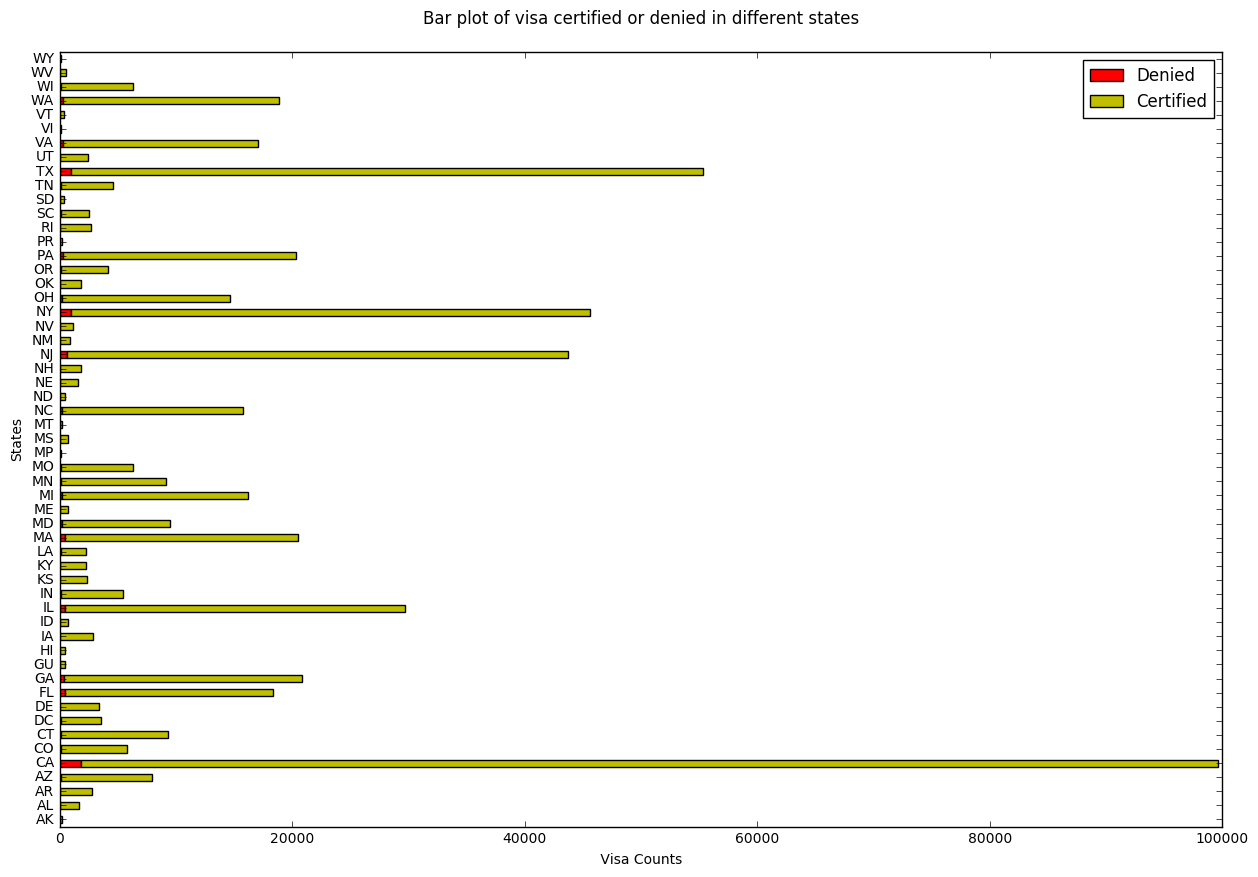

In [333]:
ax = final[['Denied','Certified']].sort().plot(kind='barh',color= ['r','y'],stacked = True ,figsize=(15, 10))
#barh(final.Certified,final.Denied, align='center',height=0.1)
pl.xlabel(' Visa Counts ')
pl.ylabel('States')
pl.title('Bar plot of visa certified or denied in different states\n')
pl.legend()
#pl.ylim(0,60000,5)
pl.show()

In [264]:
b= []
for i in range(len(data3_count)):
    if newdf.iloc[i:i+1,0].item() == data3_count.iloc[i:i+1,0].item():
        if data3_count.iloc[i:i+1,1].item() == 'CERTIFIED':
            y= data3_count.iloc[i:i+1,2].item()
            b.append(y)

ValueError: can only convert an array of size 1 to a Python scalar

In [164]:
data3_count.iloc[2:3,2]

2    1595
Name: CASE_NUMBER, dtype: int64

In [139]:
allstates = data3_count['WORKSITE_STATE'].unique()
allstates

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FM',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR',
       'PW', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA',
       'WI', 'WV', 'WY'], dtype=object)

In [173]:
newdf = pd.DataFrame()
newdf['States'] = allstates
len(newdf)

58

In [230]:
len(data3_count)

113

In [231]:
a= []
a = data3_count.loc[:,'CASE_NUMBER']
# for i in range(58):
#     a.append(data3_count.loc['CASE_NUMBER'].item())

In [232]:
a = a.values

In [233]:
len(a)

113

In [235]:
p = []
x=0
for i in range(112):
    p.append(a[x])
    x= x+2

IndexError: index 114 is out of bounds for axis 0 with size 113

In [183]:
newdf.head()

,States,Certified
0,AK,"0 140 Name: CASE_NUMBER, dtype: int64"
1,AL,"2 1595 Name: CASE_NUMBER, dtype: int64"
2,AR,"4 2767 Name: CASE_NUMBER, dtype: int64"
3,AZ,"6 7776 Name: CASE_NUMBER, dtype: int64"
4,CA,"8 97857 Name: CASE_NUMBER, dtype: int64"


In [239]:
newdf['Certified'].str.extract('(\d+)', expand=True)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [184]:
newdf['Certified'].str.split(' ', expand=True)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [136]:
sub = data3_count['CASE_SUBMITTED'][data3_count['CASE_STATUS'] == 'CERTIFIED'].groupby([data3_count['WORKSITE_STATE']
# cus = df['tripduration'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday ]).mean()

SyntaxError: unexpected EOF while parsing (<ipython-input-136-22958059acc8>, line 2)

In [131]:
data4 = data3.groupby(['EMPLOYER_NAME','CASE_STATUS']).count().reset_index()
data4.sort_values(by = 'CASE_SUBMITTED', ascending = False)


,EMPLOYER_NAME,CASE_STATUS,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,JOB_TITLE,SOC_NAME,NAIC_CODE,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,decision_date
30424,INFOSYS LIMITED,CERTIFIED,33204,33204,33204,33204,33204,33204,33204,33204,...,33204,33204,33204,33204,33204,33204,33204,33204,33204,33204
59968,TATA CONSULTANCY SERVICES LIMITED,CERTIFIED,16435,16435,16435,16435,16435,16435,16435,16435,...,16435,16426,16435,16435,16435,16435,16435,16435,16435,16435
68714,WIPRO LIMITED,CERTIFIED,10499,10499,10499,10499,10499,10499,10499,10499,...,10499,10499,10499,10499,10499,10499,10499,10499,10499,10499
972,ACCENTURE LLP,CERTIFIED,9467,9467,9467,9467,9467,9467,9467,9467,...,9467,9467,9467,9467,9467,9467,9467,9467,9467,9467
29259,IBM INDIA PRIVATE LIMITED,CERTIFIED,9027,9027,9027,9027,9027,9027,9027,9027,...,9027,9025,9027,9027,9027,9027,9027,9027,9027,9027
16951,DELOITTE CONSULTING LLP,CERTIFIED,7474,7474,7474,7474,7474,7474,7474,7474,...,7474,7344,7474,7474,7474,7474,7473,7474,7473,7474
27436,"HCL AMERICA, INC.",CERTIFIED,6087,6087,6087,6087,6087,6087,6087,6087,...,6087,6087,6087,6087,6087,6087,6087,6087,6087,6087
29560,IGATE TECHNOLOGIES INC.,CERTIFIED,4395,4395,4395,4395,4395,4395,4395,4395,...,4395,4395,4395,4395,4395,4395,4395,4395,4395,4395
20904,ERNST & YOUNG U.S. LLP,CERTIFIED,4041,4041,4041,4041,4041,4041,4041,4041,...,4041,3783,4041,4041,4041,4041,4041,4041,4041,4041
40197,MICROSOFT CORPORATION,CERTIFIED,3726,3726,3726,3726,3726,3726,3726,3726,...,3726,3722,3726,3726,3726,3726,3726,3726,3726,3726


In [133]:
data4[data4['EMPLOYER_NAME']== 'INFOSYS LIMITED']

,EMPLOYER_NAME,CASE_STATUS,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,JOB_TITLE,SOC_NAME,NAIC_CODE,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,decision_date
30424,INFOSYS LIMITED,CERTIFIED,33204,33204,33204,33204,33204,33204,33204,33204,...,33204,33204,33204,33204,33204,33204,33204,33204,33204,33204
30425,INFOSYS LIMITED,DENIED,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [129]:
data4[data4['CASE_SUBMITTED']>100]

,EMPLOYER_NAME,CASE_STATUS,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,JOB_TITLE,SOC_NAME,NAIC_CODE,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,decision_date
231,"3I INFOTECH, INC.",CERTIFIED,536,536,536,536,536,536,536,536,...,536,536,536,536,536,536,536,536,536,536
248,3S BUSINESS CORPORATION,CERTIFIED,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
401,8K MILES SOFTWARE SERVICES INC,CERTIFIED,224,224,224,224,224,224,224,224,...,224,224,224,224,224,224,224,224,224,224
580,"A.T. KEARNEY, INC.",CERTIFIED,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
586,A1 KAISER INC,CERTIFIED,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256
603,"A2Z DEVELOPMENT CENTER, INC.",CERTIFIED,216,216,216,216,216,216,216,216,...,216,216,216,216,216,216,216,216,216,216
972,ACCENTURE LLP,CERTIFIED,9467,9467,9467,9467,9467,9467,9467,9467,...,9467,9467,9467,9467,9467,9467,9467,9467,9467,9467
1342,ADAEQUARE INC,CERTIFIED,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
1418,"ADECCO GROUP NA/MODIS, INC.",CERTIFIED,118,118,118,118,118,118,118,118,...,118,115,118,118,118,118,118,118,118,118
1487,ADITI TECHNOLOGIES PVT. LTD.,CERTIFIED,154,154,154,154,154,154,154,154,...,154,154,154,154,154,154,154,154,154,154


In [ ]:
fig, ax = pl.subplots()

width = 0.35  
rects1 = ax.bar( sub.index.values , sub.tripduration, width, color='r')

In [107]:
len(data3_count.WORKSITE_STATE.unique())

58

In [104]:
data3_count.WORKSITE_STATE.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FM',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR',
       'PW', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA',
       'WI', 'WV', 'WY'], dtype=object)

In [102]:
data3_count.WORKSITE_STATE.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FM',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MH', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR',
       'PW', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA',
       'WI', 'WV', 'WY'], dtype=object)

In [96]:
data3_count = data3_count[data3_count['CASE_NUMBER'] >1000]